# 2020.01.16

# Hidden_layer

In [1]:
%matplotlib inline   
# 쥬피터에서만 사용
import matplotlib.pyplot as plt   # 시각화 할때 사용
import mglearn    # 학습도움을 위한 패키지 

# 랜덤 사이즈를 채운 후 행렬제곱을 하면 => 정방, 대칭행렬
# 고유값분해 => 고유치, 고유벡더 (이 벡터의 정직교하는 벡터를 만들어낸는것 )
# MDS 행렬곱 ( 직교하는 2,3차원을 곱하면 변환된다 ) : 2차원이나 3차원 특징추출
# forward propagation 순전파 : 예측분류 과정
# backward propagation 역전파 : 가중치 학습과정 (cost functin 기울기, learning rate)
# MLP : multi layer perceptron : FFNN (Feed forward neural network)
# solver : 미분, learning-rate 조절 => 가중치를 조절
# estimator, transformer ..? 


from sklearn.neural_network import MLPClassifier    # MPLClassifier는 분류,  MLPRegressor는 회귀
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


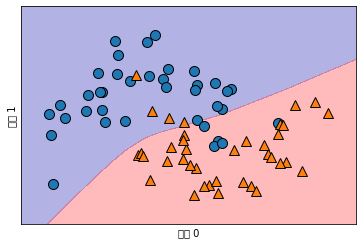

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)
# stratfy : 층화 변수 선택법 ( 무작위가 아니라  y값의 비율을 0.75 :0.25 비율로 나누는 것. 이 비율로 나눠지고 또 나누고 해서 층화 )

# Multi layer => XOR 문제 해결, 레이어가 많으면 정밀도가 자동으로 높아진다 (특징추출할때 데이터 손실방지)
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
# 가중치가 완성 (fit하면서) - 레이어 지정 : 자동으로 MLPClassifier가 가중레이어 사이즈 결정


mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [4]:
mlp.get_params()  # 디폴트 매개변수 확인

# 위에서
# mlp = MLPClassifier(random_state=0):random_state만 0으로 지정해줘서 나머지는 디폴트

# relu : 0 이하를 제거한 활성화 함수 (activation function) - 속도가 빨라짐
# 'max_iter' : 반복횟수   -> (epoch 1회반복)
#'solver': 'adam' => adam : learning-rate를 조절하고 Momentum을 사용하는 optimizer(최적화기) (라고도 함- tensorflow에서)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [9]:
mlp.n_layers_

3

In [10]:
mlp.coefs_   # coefficient
# bias : 계수들이 0으로 가는 것을 방지해서 처음에 1로 세팅

# 편향 (Bias)
#  통계적 추정결과가 체계적으로 한 쪽으로 치우치는 경향을 보임으로써 발생하는 오차. 
#  추정결과가 크거나 작아짐에 따라 발생하는 변동오차와는 달리, 추정결과가 한 쪽 방향으로 치우침에 따라 나타나는 오차임

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [11]:
mlp.classes_

array([0, 1], dtype=int64)

In [13]:
mlp.n_outputs_

1

Text(0, 0.5, '특성 1')

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


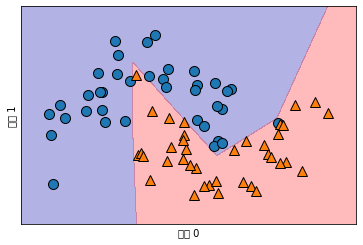

In [21]:
# 레이어가 10개이상 주면 기울기 소실문제
# 멀티레이어 : XOR문제 해결, 정확도가 높아지는 것 발견

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[5,10]) # 레이어 갯수가 늘어남 (2개를 준것)   # 10,10에서
# hidden_layer : 겹겹이 층을 만들어 더 정밀하게 만들기
# 10,10 : 과적합이 됨 (10이었으 때보다)

# 히든 레이어 사이즈 지정시 무엇을 지정하는가?
#    출력차수만 지정해주면 됨 (추출할 특징수)   (입력차수 (10) 는 지정 안해도 됨)
#    2X10, 10X10

# SVM의 논리 : 고차원으로 데이터 확대(고차원을 선호하는 모델)
# hidden_layer_sizes=[5,10,10,2]
#   -정확도가 높아 과적합을 방지
#   - SVC(Classifier), SVR(Regressor)

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [22]:
# BLACK BOX => 원인규명. ( 출력된 결과 값을 알 수 없다)

mlp.coefs_
# x,y 좌표로
# 2X10, bias 10개  <- 히든레이어가 10 이었을 때
# 변수는 2X10, 10X10   10으로 나감 


# 입력차수가 5를 해주니까 2X5가 됨 - 첫레이어. 뒤는 5X10이 됨 - 뒤레이어


# 레이어의 사이즈를 지정 출력차수만 지정 (5,10): 입력데이터
# 2X5 ,5X10 => 5는 자동지정


[array([[  9.58312525,   8.01326616,   6.38324831, -13.90108441,
          -0.14108705],
        [ -0.15831136,   3.390681  ,   2.98670712,  -1.16530986,
          -0.21540178]]),
 array([[-1.02891626, -2.33889475,  2.12972828,  0.52897872,  2.23957507,
          1.41874928,  0.148644  ,  0.34437075,  7.28226381, -0.48186345],
        [-0.81302935, -0.46973462, -0.01110334, -0.25503688, -0.09567239,
          1.07167377,  2.44161204,  0.06323068,  3.11978885, -0.63798754],
        [-0.40855756, -1.01425374,  1.89146083,  0.85156843,  2.19939312,
          1.2517127 , -2.10707856,  0.65408844,  1.40739894,  0.20930688],
        [-0.68852893,  2.66493476, -1.5262621 ,  0.33742273, -3.40176253,
         -2.50208501, -0.81709543,  3.96204422,  0.37740612, -0.58969023],
        [-0.4275745 ,  0.19328921, -0.31145316, -0.04253044, -0.32264591,
         -0.43052851, -0.49187581,  0.19735584, -0.45677027, -0.38304485]]),
 array([[-0.65227553],
        [-3.54750216],
        [-3.3272718 ],
    

n_hidden_nodes 과 alpha 

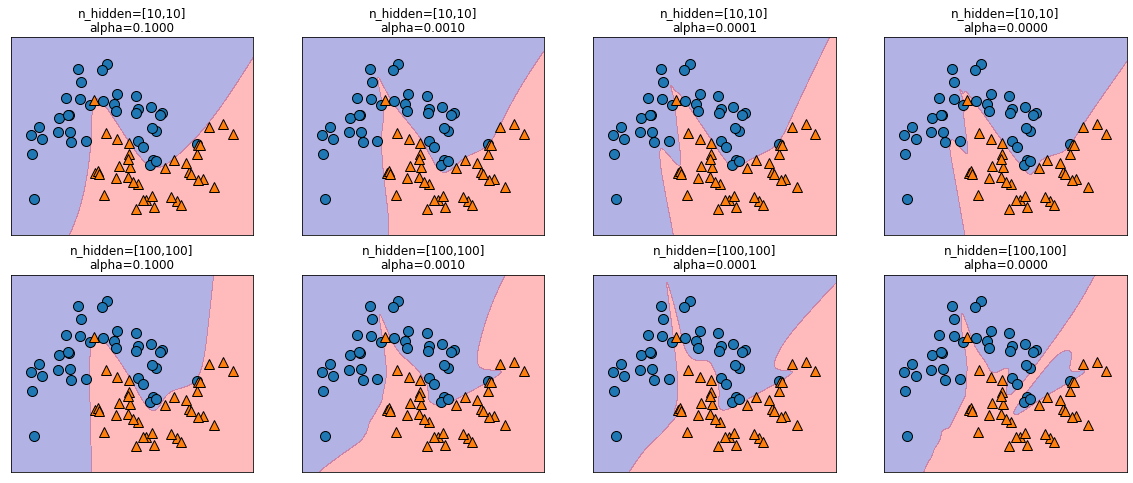

In [24]:
# 신경망은 비선형회귀이다. (다차방적식을 이용한. ) => 다항회귀 (비선형)
# 레이어는 다차방정식의 차수

fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):   # 히든을 10개주거나 100개 주거나
    for ax, alpha in zip(axx, [0.1, 0.001,0.0001,0.00001]):   # 규제값(alpha): 규제가 작아질수록 과적합이된다.  규제는 과적합되지 말라고 주는것
        mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
        
        
# 100개일때 곡선이 심해짐 (다차항(100차원) )

# 훈련, 테스트 정확도 차이  (조건에 따라)

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 최대값:\n{}".format(cancer.data.max(axis = 0)))

유방암 데이터의 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp=MLPClassifier(random_state=42)  # 나머지 디폴트
mlp.fit(X_train, y_train) # 가중치 결정
print("훈련세트 정확도:{:.2f}".format(mlp.score(X_train, y_train)))  # 94%
print("테스트세트 정확도:{:.2f}".format(mlp.score(X_test, y_test)))  # 92%  => 이정도면 나쁘지 않음
mlp

# parameter tuning 
# 과소적합 : 데이터를 늘려주거나 규제를 작게해주거나 가중치 사이즈를 줄이거나?

훈련세트 정확도:0.94
테스트세트 정확도:0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 z 점수 표준화

In [29]:
mean_on_train = X_train.mean(axis=0)  # 평균
std_on_train = X_train.std(axis=0)   # 표준편차

# z점수 표준화 
X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train)))  
print("테스트세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련세트 정확도:0.991
테스트세트 정확도:0.965


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iter

In [30]:
# max_iter : 몇번 돌려주나 (돌려주는게 많아지면 가중치가 변하게 되겠지. 가중치가 높아지거나 낮아지는건 컴퓨터가..)

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train)))  # 100%
print("테스트세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))  # 97%

훈련세트 정확도:1.000
테스트세트 정확도:0.972


alpha

In [31]:
# alpha = 1 로 줄때 (규제)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련세트 정확도:{:.3f}".format(mlp.score(X_train_scaled, y_train))) # 98% 
print("테스트세트 정확도:{:.3f}".format(mlp.score(X_test_scaled, y_test)))  # 97%

# 둘이 거의 비슷해지면 => 일반화가 되었다는 뜻!! (나쁜 경우.???)

훈련세트 정확도:0.988
테스트세트 정확도:0.972


In [32]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

시각화

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

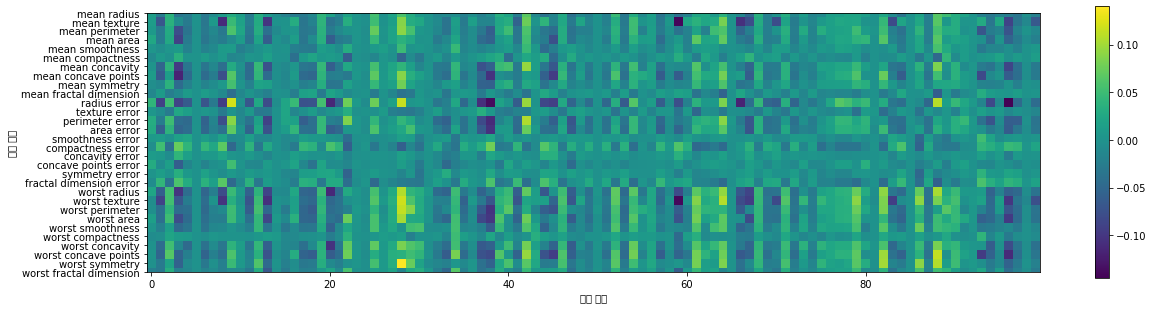

In [33]:
# 시각화하기
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

wine 데이터로 해보기

In [97]:
import pandas as pd   # csv파일 읽어들일때 pandas로 

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
wine

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
# 데이터 지정
wine.data = wine.iloc[:,1:]
wine.target = wine.iloc[:,0]

# 데이터 나누기(test, train)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)  # random_state : 난수정할때 (seed같은)
mlp=MLPClassifier(max_iter=1000, alpha=1)                                                     # 42가 가장 안정적인 수
mlp.fit(X_train, y_train)

# 학습
print("훈련세트 정확도:{:.2f}".format(mlp.score(X_train, y_train)))
print("테스트세트 정확도:{:.2f}".format(mlp.score(X_test, y_test)))

훈련세트 정확도:0.99
테스트세트 정확도:0.96


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
# z점수 학습
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

x_train_scaled = (X_train - mean_train)/std_train
x_test_scaled = (X_test - mean_train)/std_train

mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

print("z훈련세트 정확도:{:.3f}".format(mlp.score(x_train_scaled, y_train)))  
print("z테스트세트 정확도:{:.3f}".format(mlp.score(x_test_scaled, y_test)))

훈련세트 정확도:1.000
테스트세트 정확도:0.978


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# wine 실전

In [98]:
wine.shape # 178 관측치, 14변수  # 분류 :독립변수와  종속변수

(178, 14)

In [121]:
# 데이터 지정
X = wine.drop('Cultivator', axis = 1)
y = wine['Cultivator']
X


,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [122]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)  # 75 : 25

In [123]:
print(y.unique())  # 종속변수 3개

[1 2 3]


In [124]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# StandardScaler (copy = True, with_mean=True), with_std=True)  # copy=T면 원본은 수정하지 마라

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
# 모델만들기
from sklearn.neural_network import MLPClassifier

# 디폴트 hidden_layer_sizes(100, )  e디폴트 100
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [126]:
# 평가하기

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# classification_report
# precision 정밀도 = TP / (TP+FP) : 예측을 중심으로 생각
# recall 재현율 = TP/(TP+TN) : 실제값을 중심으로 생각
# f1_score :(2*(presicion*recall)) / (precision + recall)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# 1,2,3의 의미 : y_unique
# macro avg : 평균
# weighted avg : 가중평균
# support = 맞은 갯수

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, 'input feature')

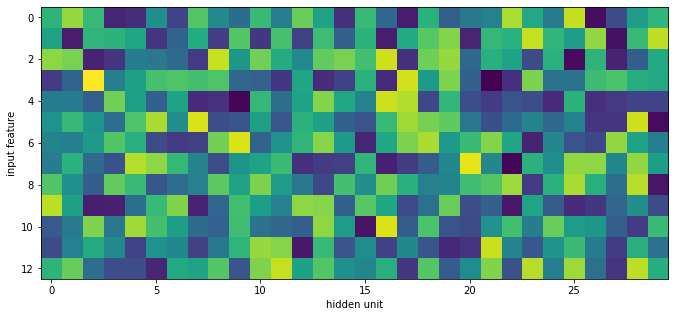

In [127]:
print(mlp.coefs_[0].shape) # 13X30
print(mlp.coefs_[1].shape) # 30X30
print(mlp.coefs_[2].shape) # 30X30
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none',cmap = 'viridis')
plt.xlabel("hidden unit")
plt.ylabel("input feature")

# plt.colorbar()

# NMF ( Non-negative matrix factorization ) : 비음수 행렬 분해
 - PCA는 음수와 양수의 차이를 상계해서 처리
 - 양수인 데이터에 적용: 음성데이터, signal 

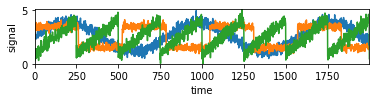

In [129]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("signal")
plt.margins(0)

In [133]:
# 노이즈 : 전송 데이터
import numpy as np
A = np.random.RandomState(0).uniform(size = (100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [135]:
from sklearn.decomposition import NMF, PCA    # nmf, pca는 decomposition 에 있음
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:{}".format(S_.shape))

복원한 신호 데이터 형태:(2000, 3)


In [136]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

폰트바꾸기

In [143]:
#폰트바꾸기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

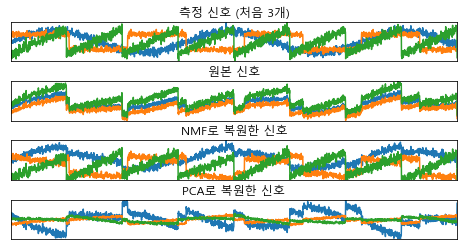

In [148]:
         # 원본, 노이즈 ,NMF, PCA
models = [S, X, S_, H]   # 노이즈 : 양수데이터는 노이즈를 제거 못함
names = ['측정 신호 (처음 3개)', '원본 신호','NMF로 복원한 신호', 'PCA로 복원한 신호']  
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw = {'hspace':.5}, subplot_kw = {'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

# 군집분석 시각화 